In [1]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset

In [2]:
path = "D:\\datasets\\Turkey-Mugla\\Yatagan.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,4/7/2005 23:27,YATAGAN (MUGLA),37.3427,28.0557,3.2,10.9,01:52.6
1,2,5/3/2005 12:24,YATAGAN (MUGLA),37.3038,27.9902,3.0,19.1,01:52.6
2,3,5/10/2005 12:30,YATAGAN (MUGLA),37.4747,28.1045,3.0,21.2,01:52.6
3,4,5/13/2005 11:56,YATAGAN (MUGLA),37.3095,28.1743,2.7,22.8,01:52.6
4,5,5/16/2005 12:04,YATAGAN (MUGLA),37.3113,28.2175,2.6,5.0,01:52.6
5,6,5/17/2005 10:34,TURGUT-YATAGAN (MUGLA),37.3735,28.0147,2.8,27.5,01:52.6
6,7,5/21/2005 11:50,TURGUT-YATAGAN (MUGLA),37.3692,27.9235,2.8,50.6,01:52.6
7,8,5/26/2005 10:52,TURGUT-YATAGAN (MUGLA),37.3552,28.0660,2.8,9.8,01:52.6
8,9,6/1/2005 12:15,TURGUT-YATAGAN (MUGLA),37.3412,28.0670,2.9,16.6,01:52.7
9,10,6/15/2005 12:29,YATAGAN (MUGLA),37.3675,28.0957,3.2,28.0,01:52.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1379 non-null   int64  
 1   Date         1379 non-null   object 
 2   Location     1379 non-null   object 
 3   Latitude     1379 non-null   float64
 4   Longtitude   1379 non-null   float64
 5   Magnitude    1379 non-null   float64
 6   Depth        1379 non-null   float64
 7   Record date  1379 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 86.3+ KB


# working on Magnitude column

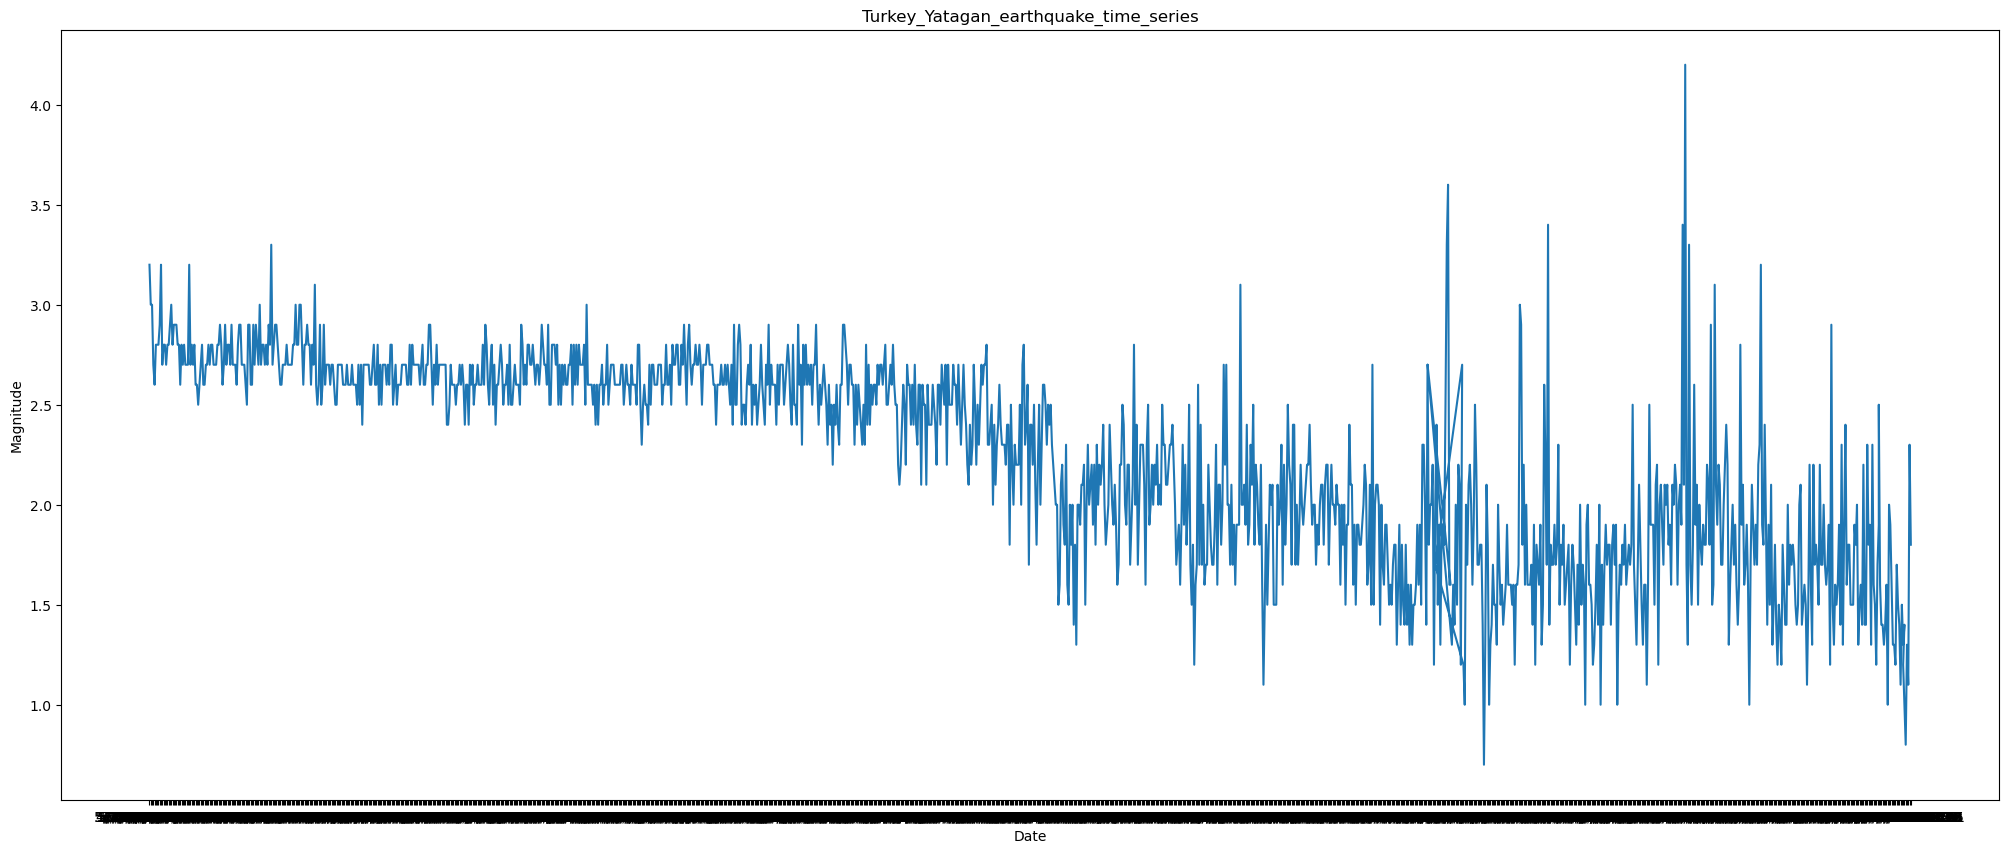

In [4]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Yatagan_earthquake_time_series')
show()

In [5]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:80


In [6]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1103
Test size: 276


In [7]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [8]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [9]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [10]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 2.8706 - mae: 1.4245
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0854 - mae: 0.2167
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0867 - mae: 0.2220
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.2182
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.2202
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.2202
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.2099
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0805 - mae: 0.2131
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0787 - mae: 0.2123
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0751 - mae: 0.2041
Epoch 11/100
18/18 [==============================] - 0s 4

18/18 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.1721
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.1753
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0594 - mae: 0.1759
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0574 - mae: 0.1705
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0547 - mae: 0.1705
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0571 - mae: 0.1742
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.1763
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0612 - mae: 0.1836
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.1699
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0549 - mae: 0.1680
Epoch 97/100
18/18 [==============================] - 0s 4ms/st

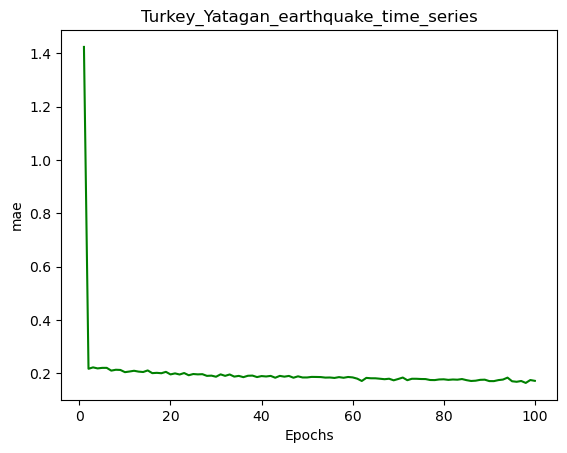

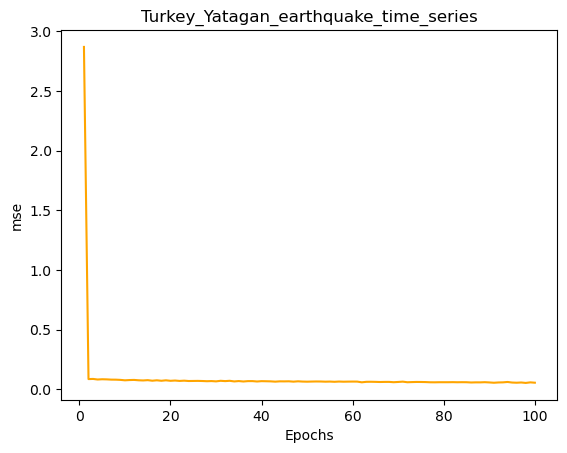

In [11]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Yatagan_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Yatagan_earthquake_time_series')
show()

In [19]:
preds_ts = Create_model().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

23/23 [==============================] - 0s 6ms/step
mse :  0 , mae :  0


In [20]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

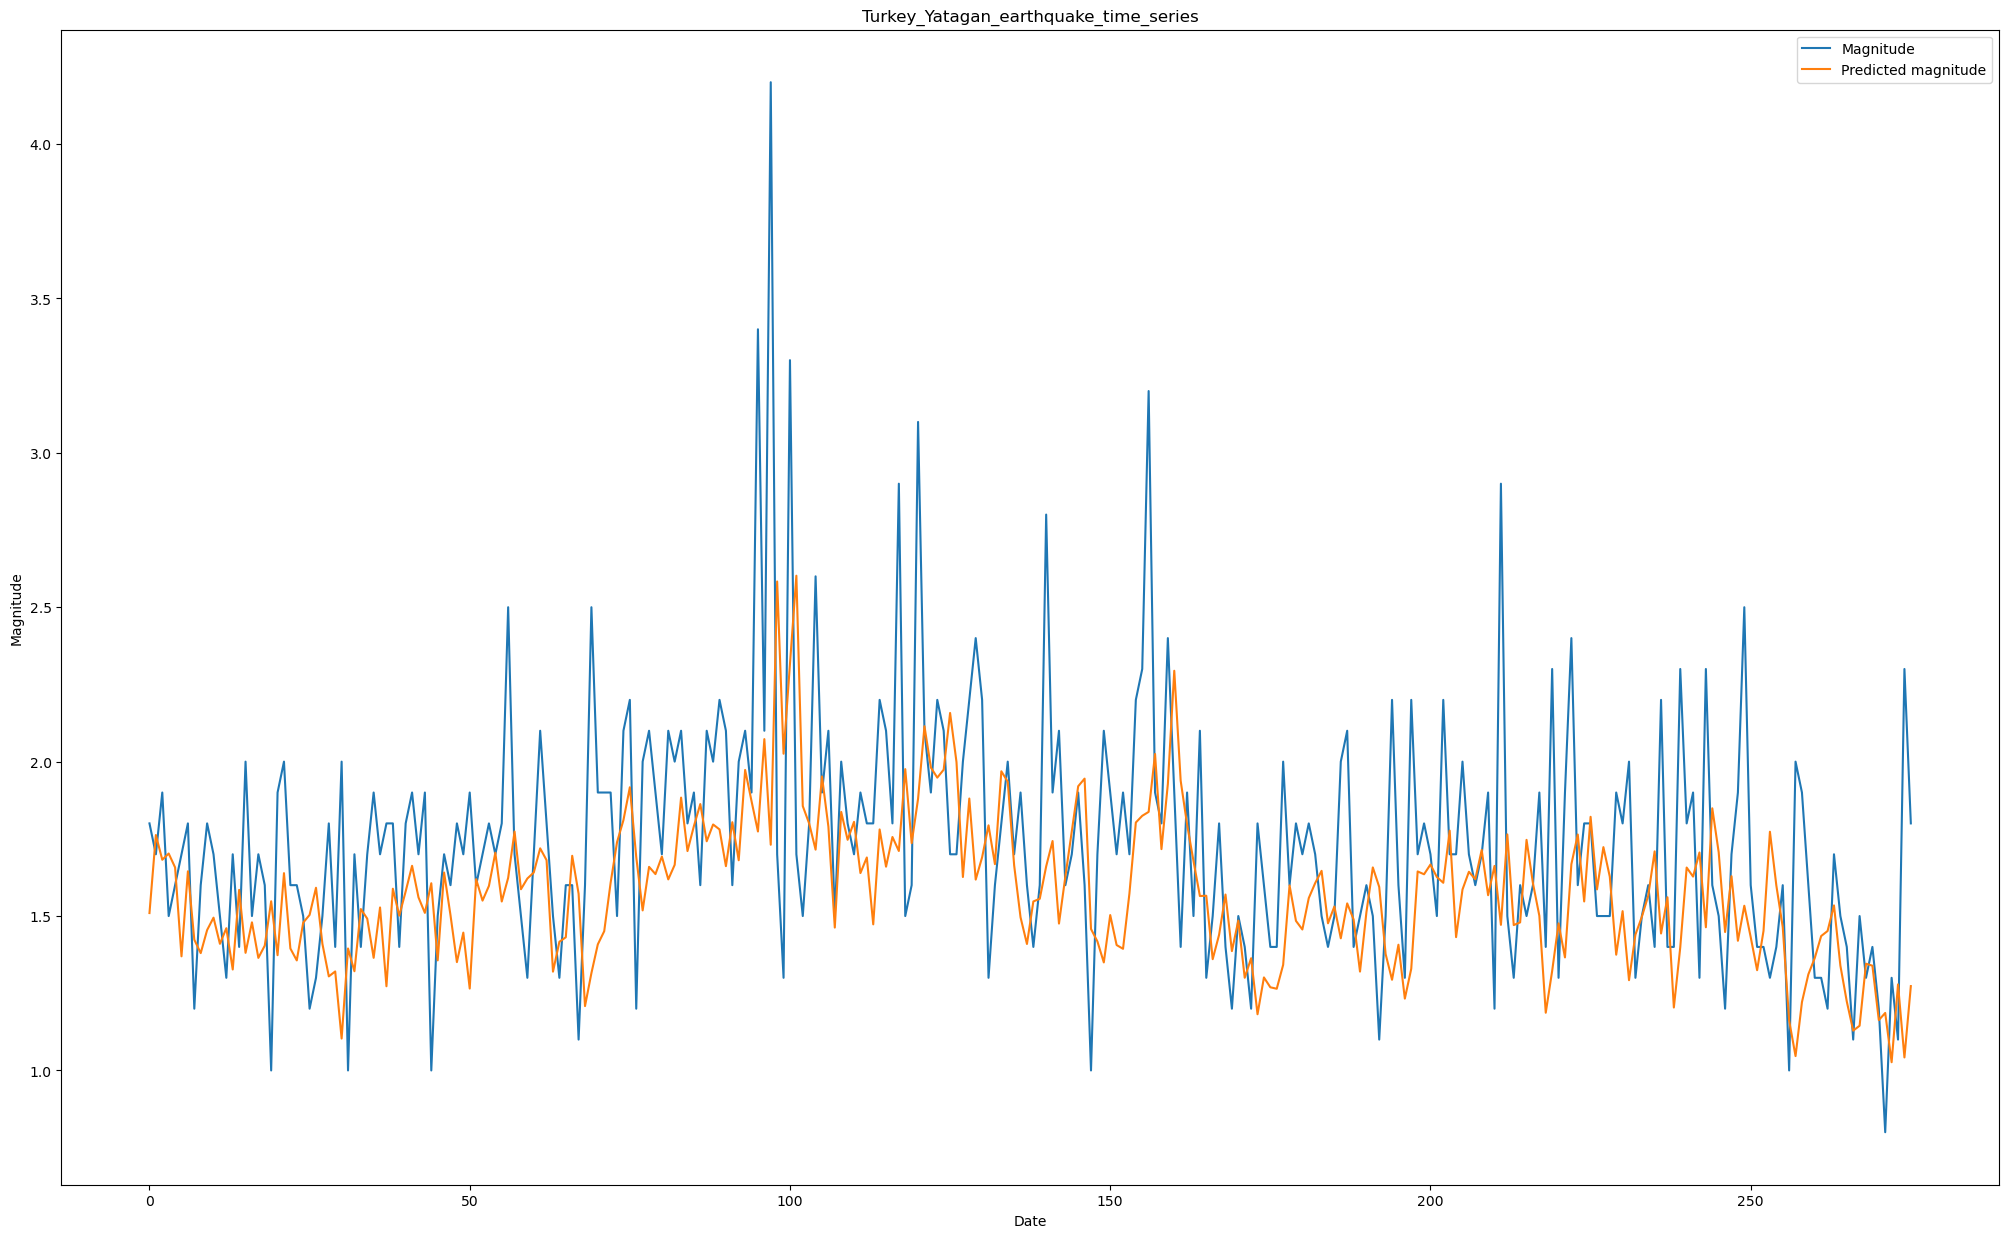

In [21]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Yatagan_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

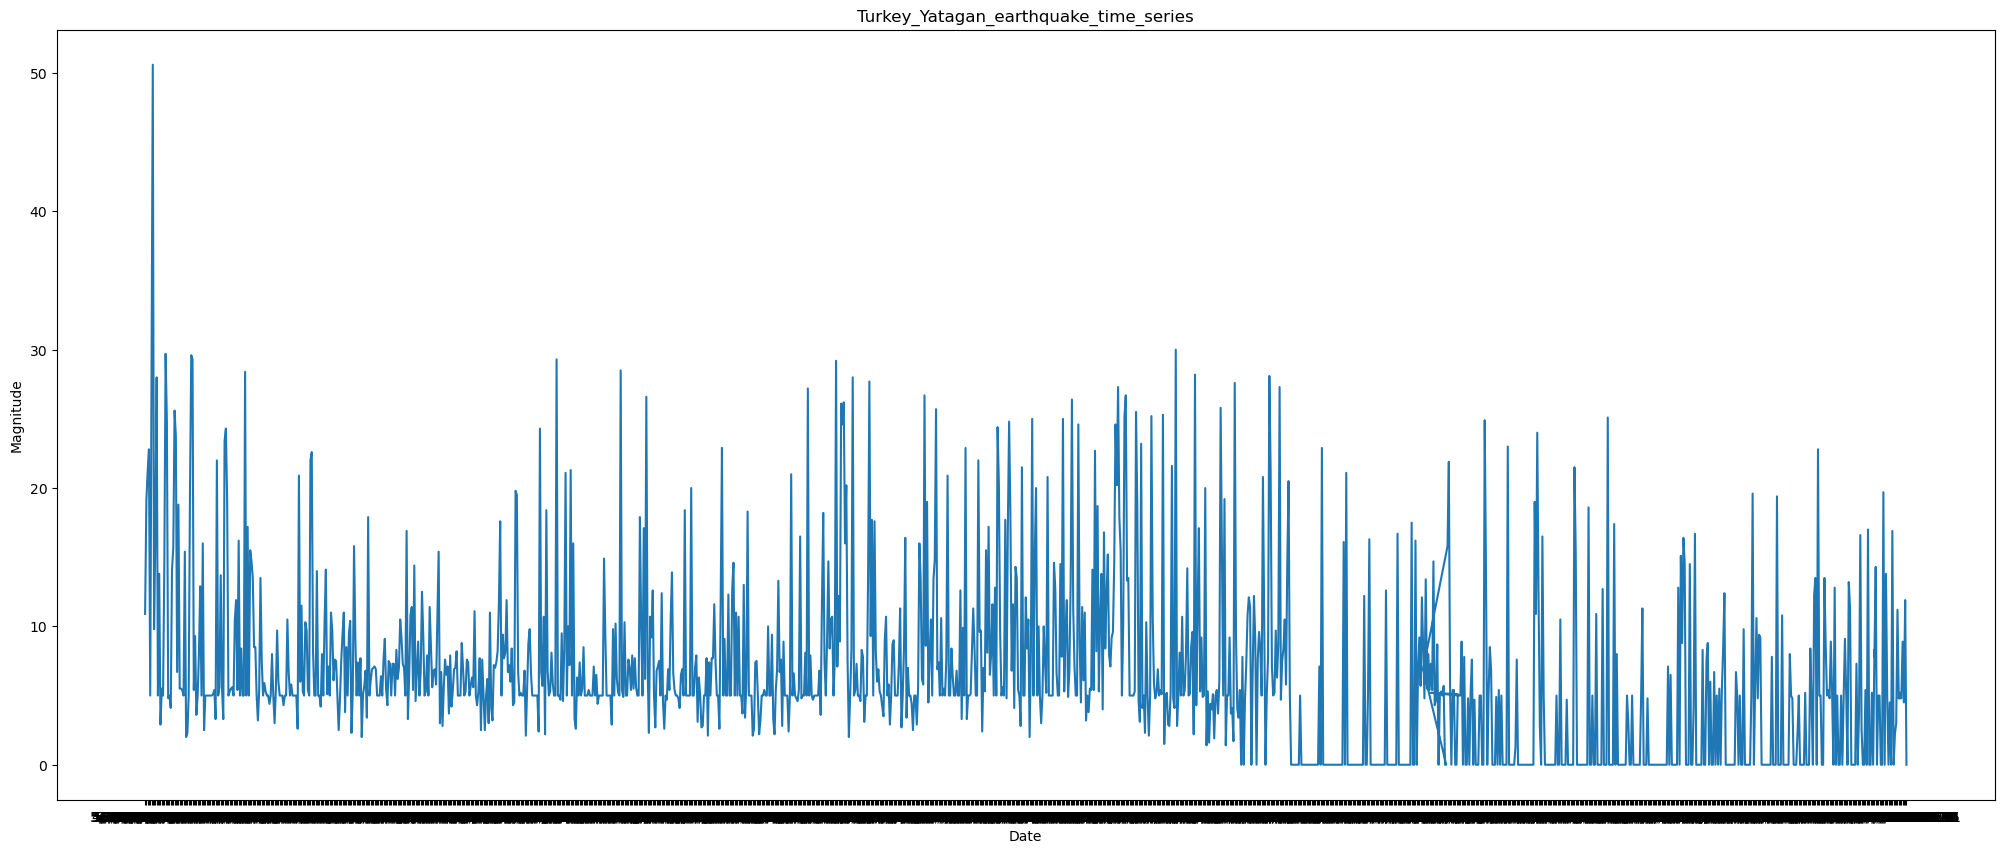

In [22]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Yatagan_earthquake_time_series')
show()

In [86]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:90


In [87]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1241
Test size: 138


In [88]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [89]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [90]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu',return_sequences=True),
                               layers.SimpleRNN(40,activation='relu',return_sequences=True),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [91]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
21/21 [==============================] - 2s 13ms/step - loss: 43.1154 - mae: 4.5222
Epoch 2/100
21/21 [==============================] - 0s 12ms/step - loss: 35.5096 - mae: 4.1376
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 34.5664 - mae: 4.0686
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 33.8786 - mae: 3.9974
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 35.7107 - mae: 4.0848
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 32.9686 - mae: 3.9359
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 32.3440 - mae: 3.9708
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 33.8601 - mae: 4.0922
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 32.8037 - mae: 3.9931
Epoch 10/100
21/21 [==============================] - 0s 7ms/step - loss: 32.7917 - mae: 3.9773
Epoch 11/100
21/21 [=======================

21/21 [==============================] - 0s 7ms/step - loss: 8.2254 - mae: 2.1366
Epoch 87/100
21/21 [==============================] - 0s 6ms/step - loss: 8.0741 - mae: 2.1195
Epoch 88/100
21/21 [==============================] - 0s 7ms/step - loss: 7.1970 - mae: 1.9587
Epoch 89/100
21/21 [==============================] - 0s 7ms/step - loss: 7.2506 - mae: 1.9863
Epoch 90/100
21/21 [==============================] - 0s 7ms/step - loss: 6.7143 - mae: 1.9540
Epoch 91/100
21/21 [==============================] - 0s 7ms/step - loss: 7.7870 - mae: 2.0324
Epoch 92/100
21/21 [==============================] - 0s 7ms/step - loss: 7.2085 - mae: 1.9928
Epoch 93/100
21/21 [==============================] - 0s 6ms/step - loss: 6.3830 - mae: 1.8849
Epoch 94/100
21/21 [==============================] - 0s 7ms/step - loss: 7.0113 - mae: 1.9526
Epoch 95/100
21/21 [==============================] - 0s 7ms/step - loss: 7.0590 - mae: 2.0000
Epoch 96/100
21/21 [==============================] - 0s 7ms/st

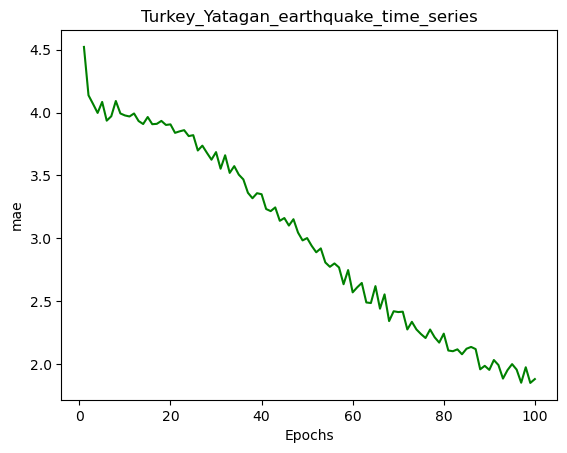

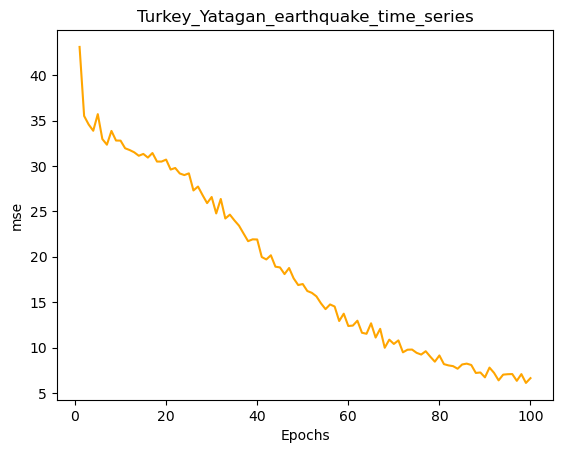

In [92]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Yatagan_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Yatagan_earthquake_time_series')
show()

In [103]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

23/23 [==============================] - 0s 9ms/step
mse : 38 , mae :  4


In [104]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

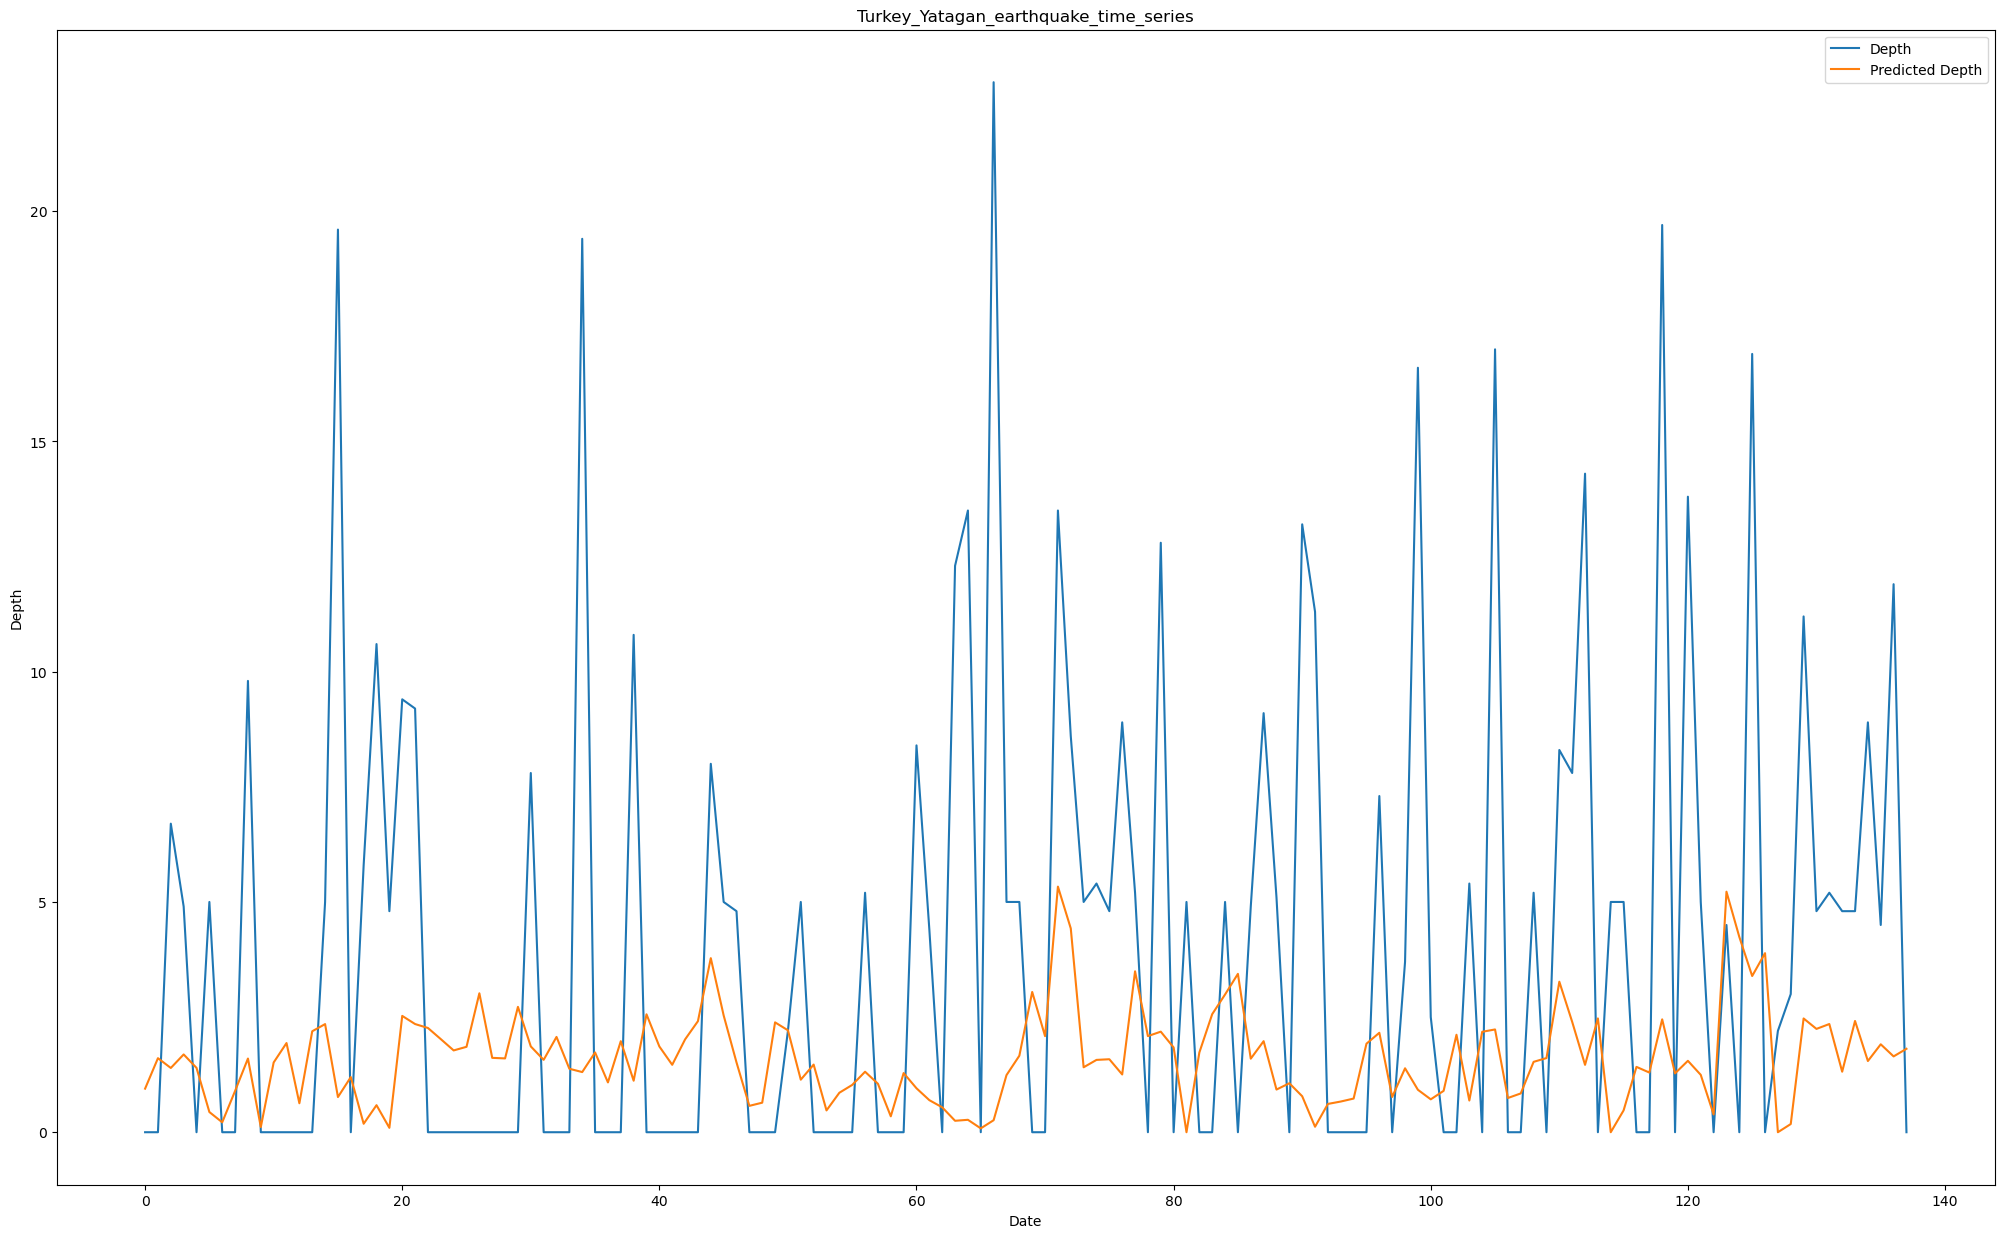

In [105]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Yatagan_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()